In [25]:
# Environment Setup
import os
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
print("="*72)

%reload_ext watermark
%watermark -a "Nabil" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

Author: Nabil

Last updated: 2024-12-15

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Imported Packages and Their Versions:
numpy     : 2.0.2
matplotlib: 3.9.2
tensorflow: 2.18.0
pandas    : 2.2.3
sys       : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
sklearn   : 1.5.2
keras     : 3.6.0



In [34]:
# load the data: titanic
data=pd.read_csv("https://raw.githubusercontent.com/DrSaadLa/PythonTuts/refs/heads/main/keras/Housing_california.csv")  

In [35]:
# Check the data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    bool   
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB


In [6]:
# Check the data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
SalePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [7]:
# Check the data shape
print(data.shape)

(20640, 9)


In [9]:
# Split the data into features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [10]:
# define the model
model = Sequential(name = "RegressionModel")

In [11]:
# Define the model
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(164, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])


In [29]:
# Check the model summary
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 164)                 │           1,476 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          10,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,149 (55.27 KB)

 Trainable params: 14,149 (55.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Fitting the model
# 1- Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the model
history = model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                    validation_split=0.2,
                   epochs=60, 
                   batch_size=64,
                   verbose=1)

Epoch 1/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5894 - mae: 0.5773 - val_loss: 0.5509 - val_mae: 0.5280
Epoch 2/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5294 - mae: 0.5449 - val_loss: 0.5555 - val_mae: 0.5782
Epoch 3/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5464 - mae: 0.5518 - val_loss: 0.6248 - val_mae: 0.5547
Epoch 4/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5296 - mae: 0.5458 - val_loss: 0.5815 - val_mae: 0.5500
Epoch 5/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5759 - mae: 0.5647 - val_loss: 0.5107 - val_mae: 0.5333
Epoch 6/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5329 - mae: 0.5466 - val_loss: 0.6429 - val_mae: 0.5728
Epoch 7/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5425 - mae: 0.5502 - val_loss: 0.5131 - val_mae: 0.5402
Epoch 8/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5103 - mae: 0.5289 - val_loss: 0.5553 - val_mae: 0.5786
Epoch 9/60
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

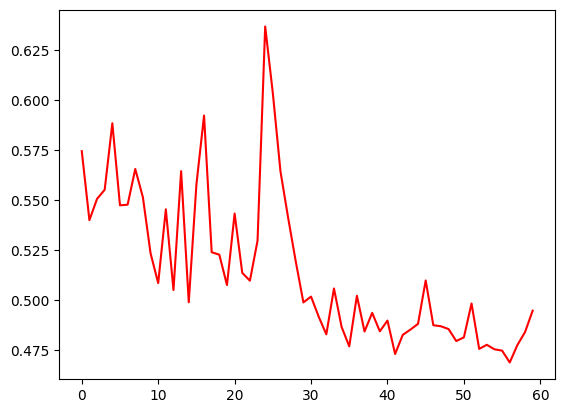

In [19]:
# Plot the loss metric
plt.plot(history.history['loss'], color = "red")
plt.show()

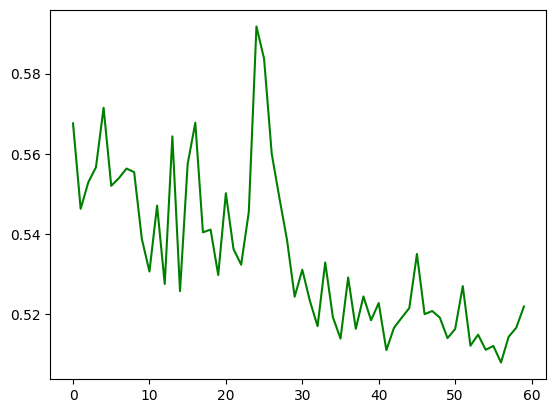

In [24]:
# Plot the mae metric
plt.plot(history.history['mae'], color = "green")
plt.show()

In [18]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('loss:', loss)
print('Test Mean Absolute Error:', mae)

loss: 0.4699901342391968
Test Mean Absolute Error: 0.5041753649711609


In [30]:
# Make predictions
predictions = model.predict(X_test)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


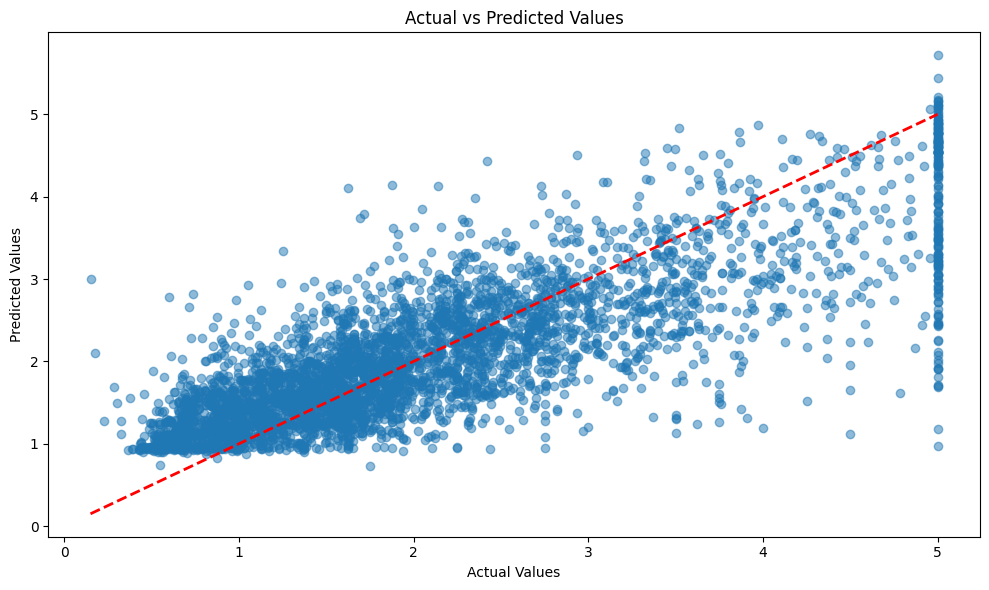

In [31]:
# Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

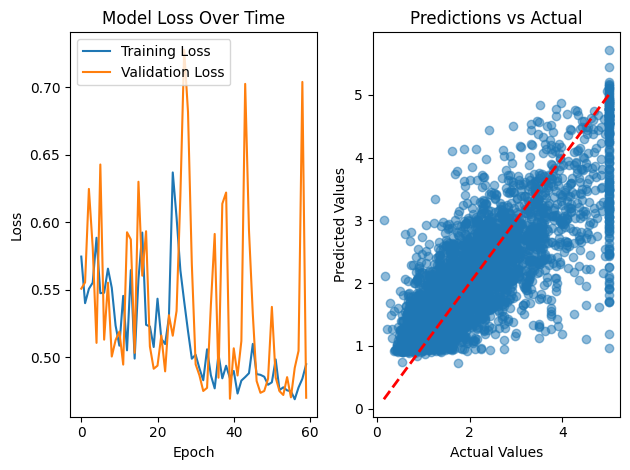

In [32]:
# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual')

plt.tight_layout()
plt.show()